In [1]:
#importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time #import time library as we will need to use it to check the runtime of our model
from datetime import timedelta
from tempfile import mkdtemp

pd.set_option('display.max_columns', None)

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

## Game plan
- Cleaning data (null values, data type, correlation, scatter plot...)
- Basic ML (Linear, SVC, Random forest...)
- Neural network...
- Final report

# 1. Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
null_data = pd.DataFrame(data = df.isnull().sum(), columns = ['Num_empty'])

In [7]:
null_data = null_data[null_data['Num_empty']>0]
null_data

,Num_empty
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


Columns that have NA as a right value:
- Alley
- MasVnrType
- MasVnrArea	
- BsmtQual
- BsmtCond
- BsmtExposure: 
- BsmtFinType1: 
- BsmtFinType2: 
- FireplaceQu: 
- GarageType: 
- GarageYrBlt
- GarageFinish: 
- GarageQual: 
- GarageCond: 
- PoolQC: 
- Fence: 
- MiscFeature: 

So we have only 1 empty values in electrical, we can safely remove it and convert the null values in these columns to the right values

In [8]:
null_data.index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
numeric_replace = ['LotFrontage', 'MasVnrArea','GarageYrBlt']
object_replace = ['Alley', 'MasVnrType', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']

In [10]:
for i in numeric_replace:
    df[i].fillna(0, inplace = True)

In [11]:
for i in object_replace:
    df[i].fillna('NA', inplace = True)

In [12]:
df.isnull().sum().sum()

1

In [13]:
df.dropna(inplace = True)

In [14]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.010589,-0.020248,-0.033170,-0.027553,0.013167,-0.013945,-0.023158,-0.050515,-0.004001,-0.005668,-0.007508,-0.013815,0.011627,0.004885,-0.044139,0.008524,0.003158,-0.019917,0.004758,0.005494,0.037577,0.003177,0.026948,-0.018788,0.013180,0.016254,0.018010,-0.029716,0.000267,0.003272,-0.046550,0.001617,0.057163,-0.006155,0.021708,0.000566,-0.021756
MSSubClass,0.010589,1.000000,-0.215226,-0.139766,0.032936,-0.059134,0.027435,0.040199,0.023792,-0.069501,-0.065549,-0.140627,-0.238160,-0.251484,0.307713,0.046524,0.074949,0.003799,-0.002243,0.131354,0.177004,-0.023502,0.281833,0.040274,-0.045232,-0.081122,-0.040232,-0.098558,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230
LotFrontage,-0.020248,-0.215226,1.000000,0.100770,0.176853,-0.053308,0.036523,0.078396,0.105202,0.076996,-0.009225,0.160976,0.238950,0.245613,0.042354,0.050022,0.220436,0.010767,-0.027785,0.120342,-0.013333,0.144455,0.034492,0.221328,0.044324,0.019226,0.165150,0.201599,-0.016795,0.069836,0.027478,0.023536,0.023053,0.114135,-0.059583,0.019094,-0.012137,0.209692
LotArea,-0.033170,-0.139766,0.100770,1.000000,0.105786,-0.005665,0.014296,0.013852,0.103302,0.214121,0.111158,-0.002641,0.260962,0.299533,0.051030,0.004773,0.263109,0.158147,0.048034,0.126100,0.014333,0.119700,-0.017796,0.190037,0.271398,0.072618,0.154893,0.180392,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837
OverallQual,-0.027553,0.032936,0.176853,0.105786,1.000000,-0.092243,0.573334,0.551605,0.407075,0.239265,-0.059291,0.308018,0.537523,0.475933,0.295969,-0.030502,0.593021,0.110700,-0.040291,0.551267,0.274328,0.101789,-0.184040,0.427720,0.396455,0.289236,0.600991,0.561980,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
OverallCond,0.013167,-0.059134,-0.053308,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.125922,-0.046595,0.040132,-0.137008,-0.171796,-0.144646,0.029187,0.025454,-0.079777,-0.055250,0.117749,-0.193929,-0.060371,0.013039,-0.087085,-0.057485,-0.024167,-0.006408,-0.185670,-0.151662,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924
YearBuilt,-0.013945,0.027435,0.036523,0.014296,0.573334,-0.375780,1.000000,0.592512,0.312227,0.250465,-0.048903,0.149444,0.393159,0.283056,0.009784,-0.183774,0.199286,0.188374,-0.037990,0.467960,0.241923,-0.070813,-0.174715,0.095401,0.148580,0.271921,0.537866,0.479460,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273
YearRemodAdd,-0.023158,0.040199,0.078396,0.013852,0.551605,0.074158,0.592512,1.000000,0.177038,0.129259,-0.067575,0.181520,0.292546,0.241344,0.139607,-0.062356,0.287677,0.120148,-0.012165,0.438733,0.182595,-0.040718,-0.149503,0.191603,0.113360,0.146195,0.420573,0.372012,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430
MasVnrArea,-0.050515,0.023792,0.105202,0.103302,0.407075,-0.125922,0.312227,0.177038,1.000000,0.260989,-0.071453,0.113719,0.359798,0.339605,0.174109,-0.068683,0.388012,0.082718,0.027312,0.273397,0.199713,0.102851,-0.038538,0.279724,0.246747,0.132835,0.362119,0.370807,0.160026,0.122287,-0.110065,0.019100,0.062151,0.011903,-0.029550,-0.006916,-0.008263,0.472606
BsmtFinSF1,-0.004001,-0.069501,0.076996,0.214121,0.239265,-0.046595,0.250465,0.129259,0.260989,1.000000,-0.050328,-0.495718,0.521963,0.445473,-0.136697,-0.064604,0.208088,0.649025,0.067281,0.059102,0.005085,-0.107281,-0.081175,0.044529,0.259541,0.116087,0.224342,0.296851,0.204403,0.111346,-0.102581,0.026

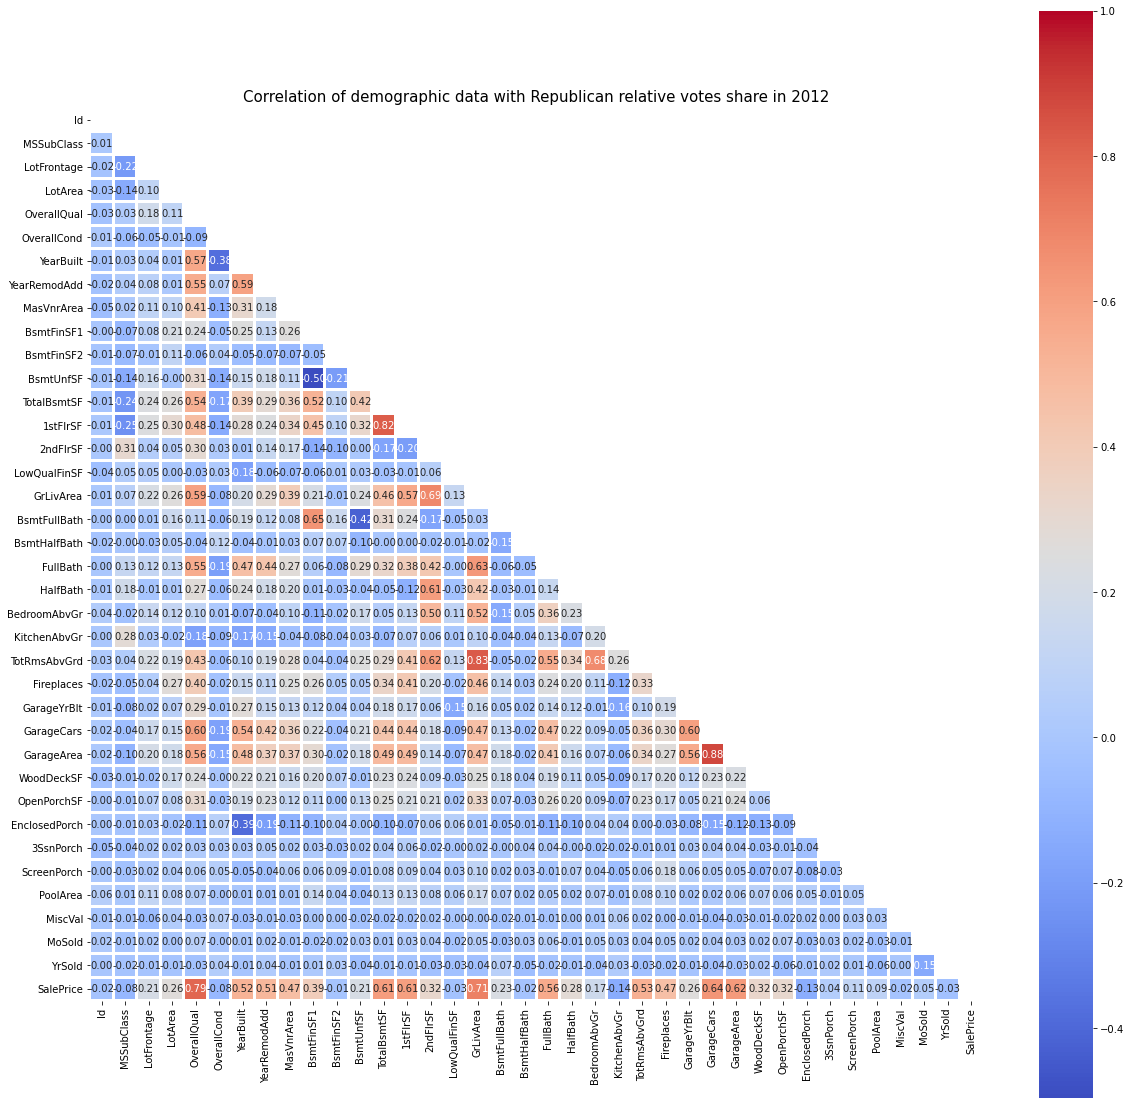

In [15]:
corrmat = df.corr() # creating correlation variable to use in chart
mask = np.triu(corrmat) # as corellation chart are symetrical, we use a mask to only get half the chart
f, ax = plt.subplots(figsize=(20, 20)) #set up canvas size
ax = sns.heatmap(corrmat, # correlation data
                 vmax=1, #color map setup
                 cmap="coolwarm", #colormap
                 square=True, #make each value to be the same shape
                 annot=True,fmt = '.2f',  #showing values inside square
                 linewidth=2, 
                 mask = mask) # showing only half the map
plt.title('Correlation of demographic data with Republican relative votes share in 2012', fontsize = 15) #set Chart title
plt.show()

In [16]:
object_col = []
num_col = []
for i in df.columns:
    if df[i].dtypes == 'object':
        object_col.append(i)
    else:
        num_col.append(i)

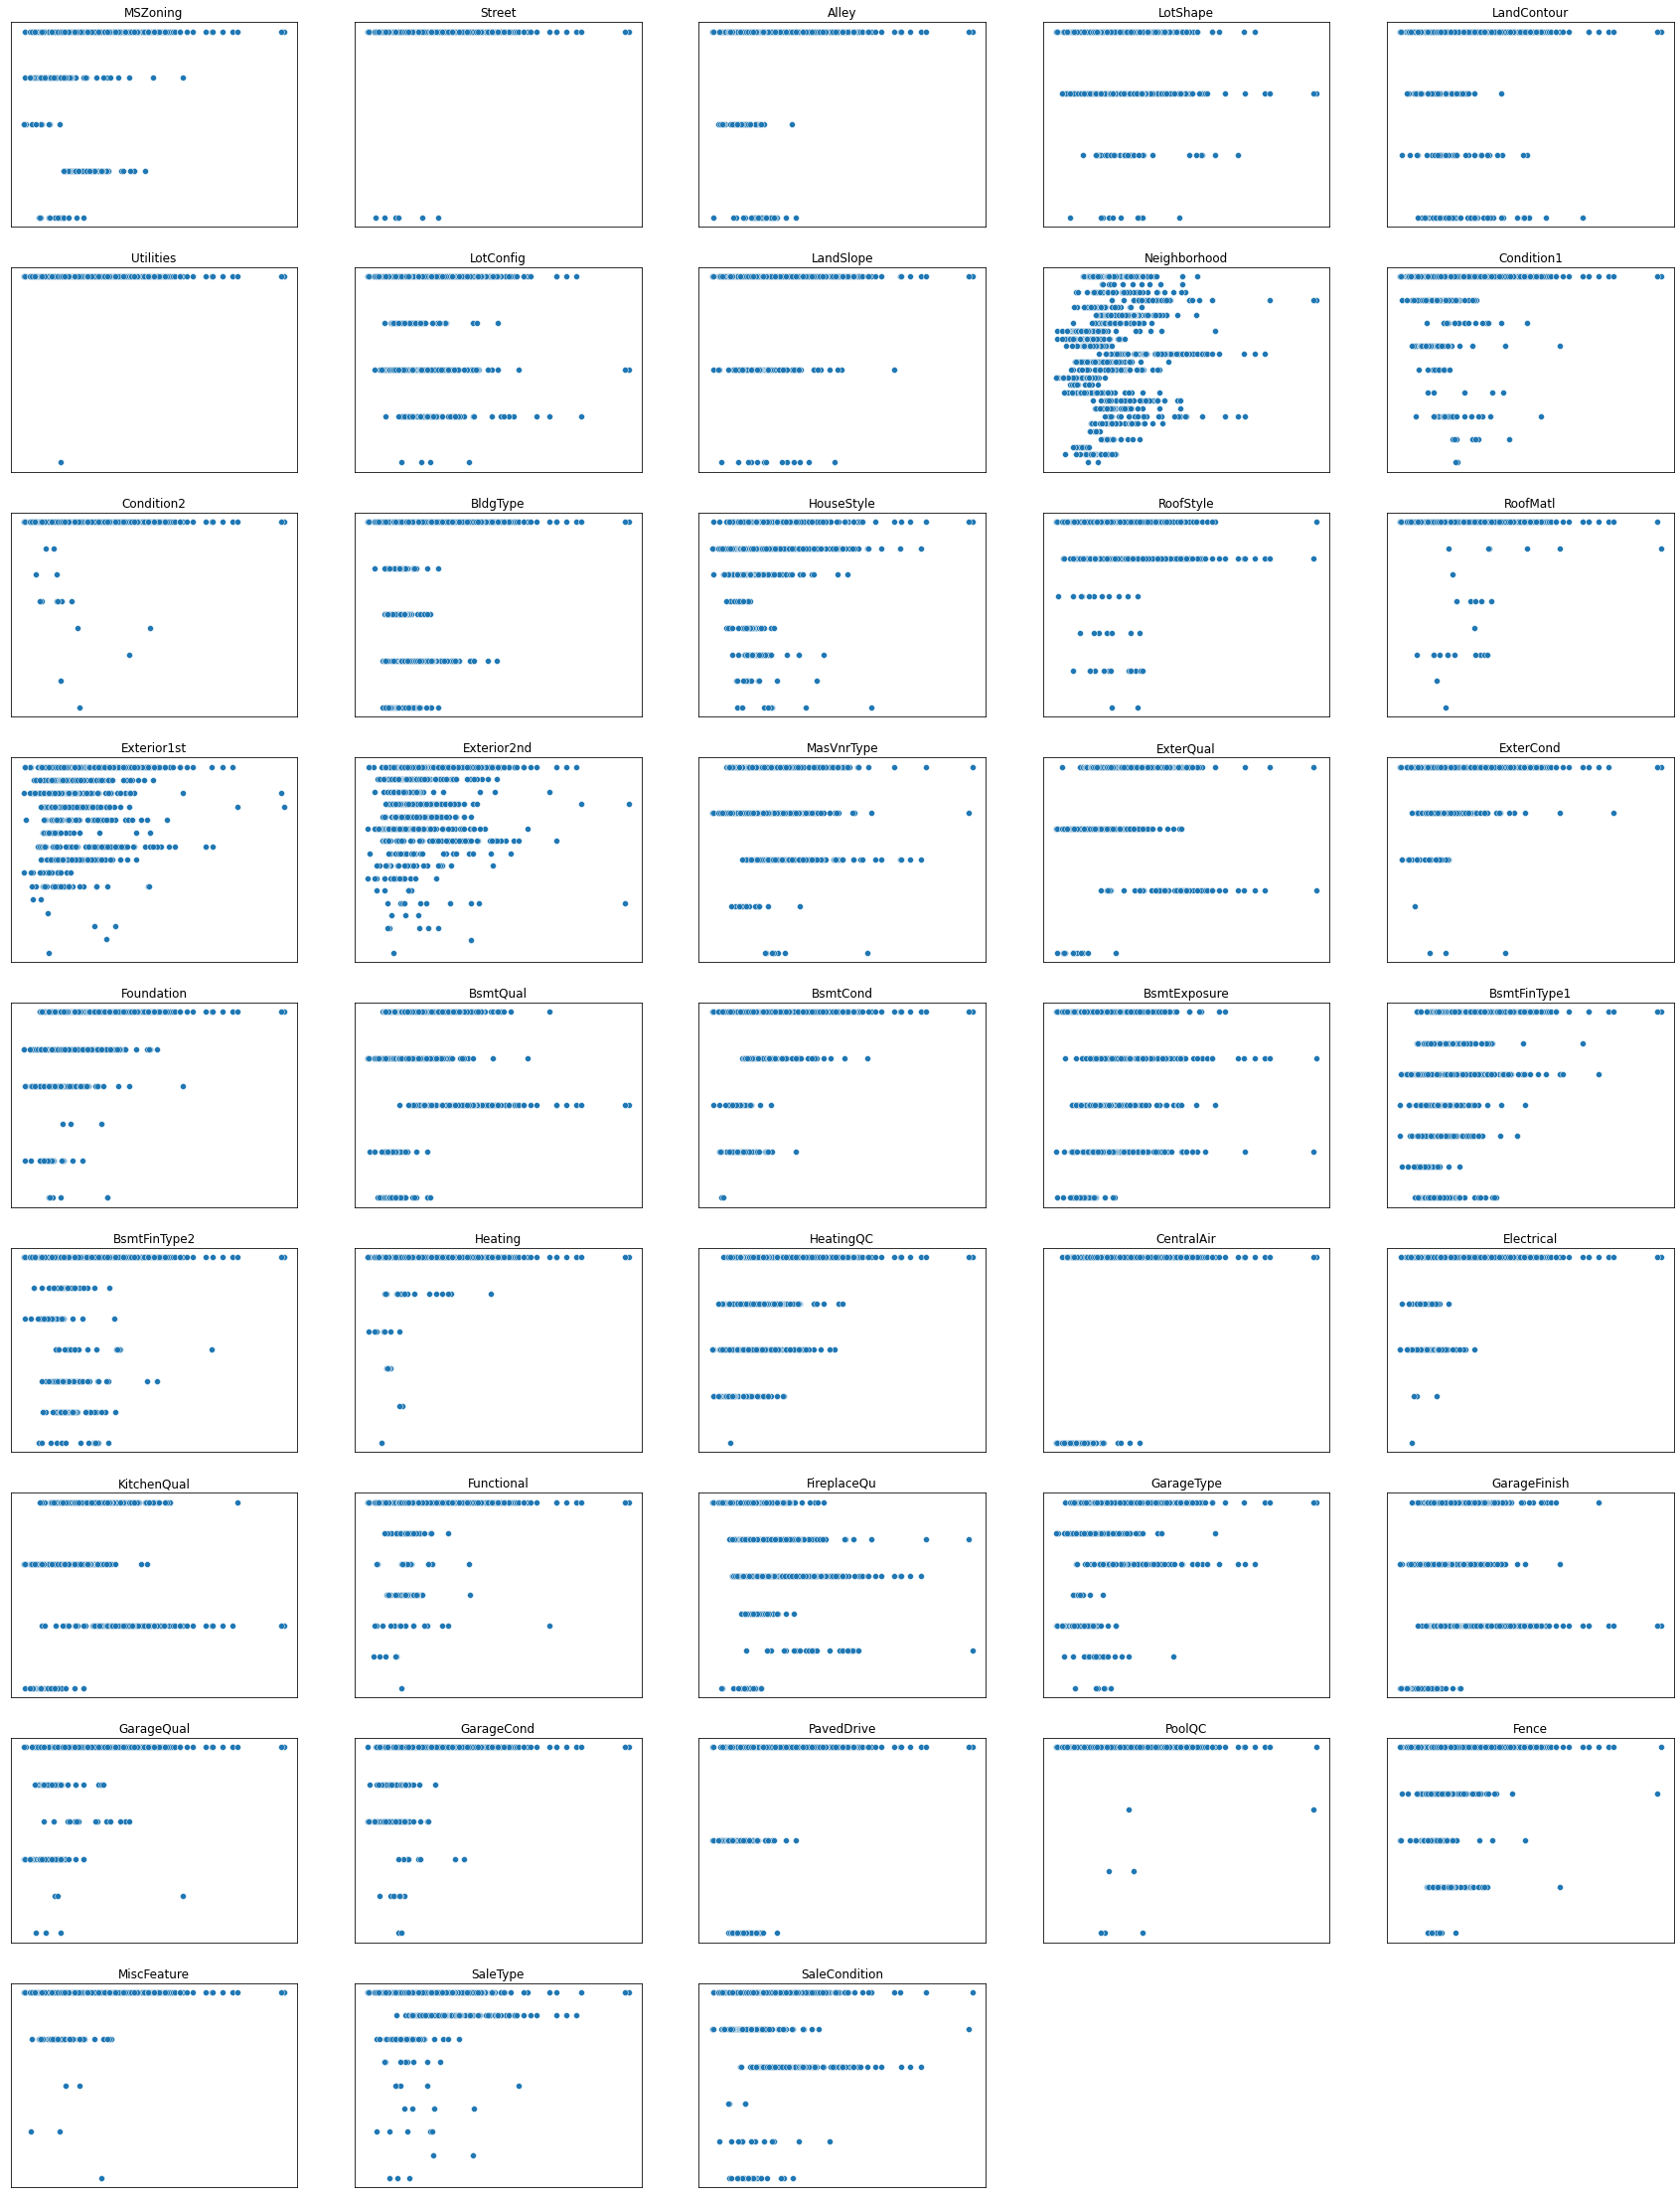

In [17]:
fig = plt.figure(figsize = (30,90)) #set up figure size
for i in range(len(object_col)): # iterate through all the columns of rep16n df
    ax = fig.add_subplot (20,5,i+1) #iterate through subplot
    ax = sns.scatterplot(x = df['SalePrice'], y = df[object_col[i]]) #scatter plot between `relative_votes` and other variables
    ax.axes.yaxis.set_visible(False) #remove the yaxis unit as we only care about the trend here
    ax.axes.xaxis.set_visible(False)
    plt.title(object_col[i]) #change the title of each plot to respective columns

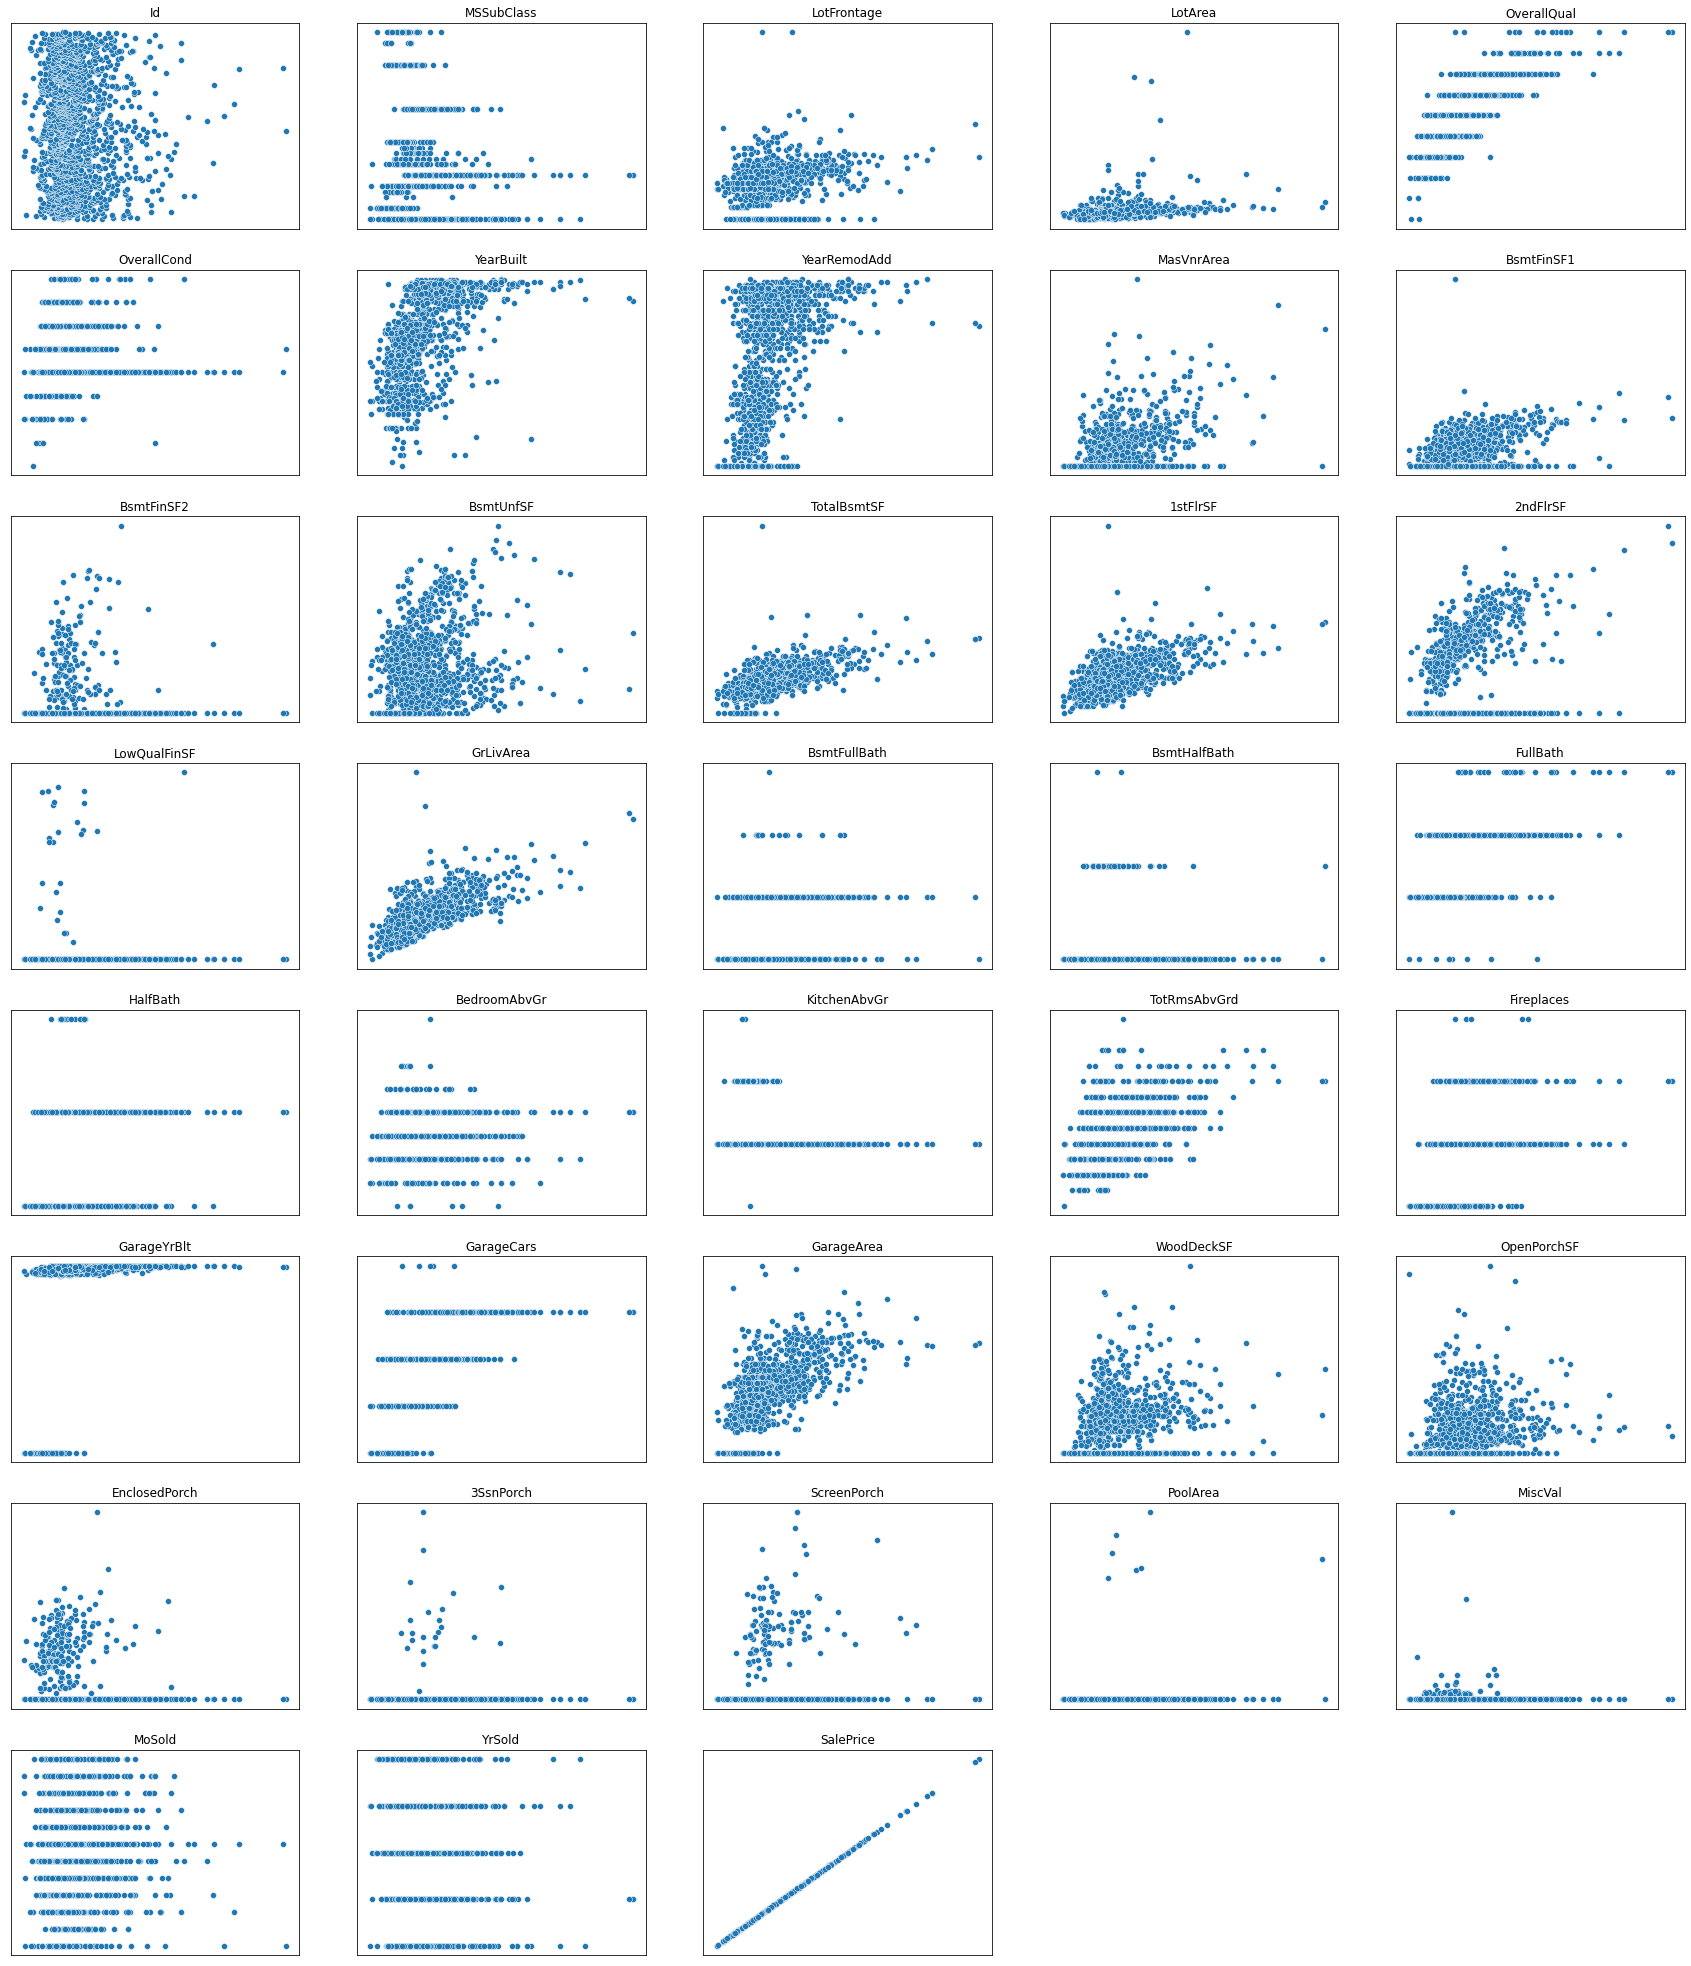

In [18]:
fig = plt.figure(figsize = (30,90)) #set up figure size
for i in range(len(num_col)): # iterate through all the columns of rep16n df
    ax = fig.add_subplot (20,5,i+1) #iterate through subplot
    ax = sns.scatterplot(df['SalePrice'], df[num_col[i]]) #scatter plot between `relative_votes` and other variables
    ax.axes.yaxis.set_visible(False) #remove the yaxis unit as we only care about the trend here
    ax.axes.xaxis.set_visible(False)
    plt.title(num_col[i]) #change the title of each plot to respective columns

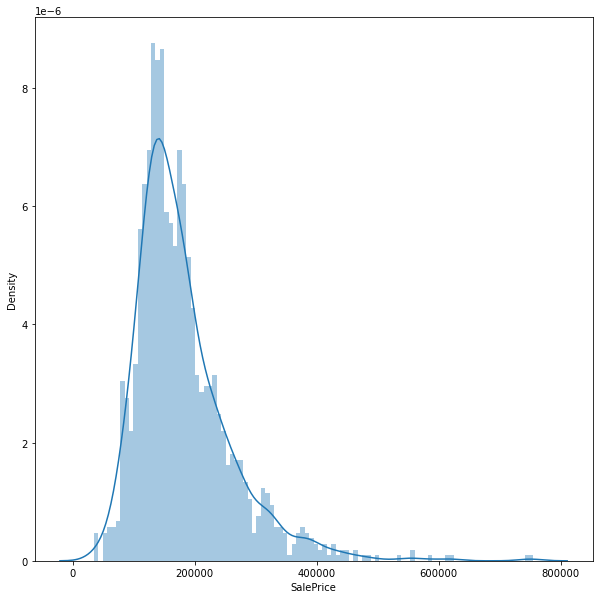

In [19]:
plt.figure(figsize = (10,10))
sns.distplot(df['SalePrice'], bins = 100)
plt.show()

# 2. Data preparing

We will need to encode the categorical data by 2 method:
- For the features that doesnt have any structure, we can use one-hot encoding.
- For the features that have ordinal structure, we can use ordinal encoding.

In [20]:
df_raw = df.copy()

In [21]:
y = df['SalePrice']
df = df.drop(['SalePrice'], axis =1)

In [22]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NA,MnPrv,NA,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NA,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,

In [23]:
data_type = pd.DataFrame(data = df.dtypes, columns = ['Data_type'])
num_col = data_type[data_type['Data_type'] != 'object']
num_col

,Data_type
Id,int64
MSSubClass,int64
LotFrontage,float64
LotArea,int64
OverallQual,int64
OverallCond,int64
YearBuilt,int64
YearRemodAdd,int64
MasVnrArea,float64
BsmtFinSF1,int64


In [24]:
obj_col = data_type[data_type['Data_type'] == 'object']
obj_col

,Data_type
MSZoning,object
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object
LandSlope,object
Neighborhood,object
Condition1,object


In [25]:
one_hot_col = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
              'Foundation', 'Heating', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create the column transformations list + columns to which to apply
col_transforms = [('MSZoning', OneHotEncoder(), ['MSZoning']),
                  ('Street', OneHotEncoder(), ['Street']),
                  ('Alley', OneHotEncoder(), ['Alley']),
                  ('LandContour', OneHotEncoder(), ['LandContour']),
                  ('LotConfig', OneHotEncoder(), ['LotConfig']),
                  ('Neighborhood', OneHotEncoder(), ['Neighborhood']),
                  ('Condition1', OneHotEncoder(), ['Condition1']),
                  ('Condition2', OneHotEncoder(), ['Condition2']),
                  ('BldgType', OneHotEncoder(), ['BldgType']),
                  ('RoofStyle', OneHotEncoder(), ['RoofStyle']),
                  ('RoofMatl', OneHotEncoder(), ['RoofMatl']),
                  ('Exterior1st', OneHotEncoder(), ['Exterior1st']),
                  ('Exterior2nd', OneHotEncoder(), ['Exterior2nd']),
                  ('MasVnrType', OneHotEncoder(), ['MasVnrType']),
                  ('Foundation', OneHotEncoder(), ['Foundation']),
                  ('Heating', OneHotEncoder(), ['Heating']),
                  ('GarageType', OneHotEncoder(), ['GarageType']),
                  ('PavedDrive', OneHotEncoder(), ['PavedDrive']),
                  ('MiscFeature', OneHotEncoder(), ['MiscFeature']),
                  ('SaleType', OneHotEncoder(), ['SaleType']),
                  ('SaleCondition', OneHotEncoder(), ['SaleCondition'])
                 ]


# Create the column transformer
col_trans = ColumnTransformer(col_transforms)

# Fit
col_trans = col_trans.fit(df)
#transform
col_trans_matrix = col_trans.transform(df)
#revert back to df 
df_oh_encoded = pd.DataFrame.sparse.from_spmatrix(col_trans_matrix, columns = col_trans.get_feature_names())

In [27]:
col_trans_matrix

<1459x158 sparse matrix of type '<class 'numpy.float64'>'
	with 30639 stored elements in Compressed Sparse Row format>

In [28]:
df.shape

(1459, 80)

In [29]:
df_oh_encoded.shape

(1459, 158)

#### Ordinal Encoded

In [30]:
ordinal_col = list(set(obj_col.index)-set(one_hot_col))
ordinal_col.sort()

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
def ordinal_tran(data,order, col_name):
    OE = OrdinalEncoder(categories = [order])
    data[col_name] = OE.fit_transform(data[[col_name]])    

In [33]:
BsmtCond_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtExposure_ord = ['NA', 'No', 'Mn', 'Av', 'Gd']
BsmtFinType1_ord = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
BsmtFinType2_ord = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
BsmtQual_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
CentralAir_ord = ['N', 'Y']
Electrical_ord = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
ExterCond_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterQual_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
Fence_ord = ['NA', 'MnWw', 'GdWo','MnPrv', 'GdPrv']
FireplaceQu_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
Functional_ord = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
GarageCond_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageFinish_ord = ['NA', 'Unf', 'RFn', 'Fin']
GarageQual_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
HeatingQC_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
HouseStyle_ord = ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl']
KitchenQual_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
LandSlope_ord = ['Sev', 'Mod', 'Gtl']
LotShape_ord = ['IR3', 'IR2', 'IR1', 'Reg']
PoolQC_ord = ['NA', 'Fa', 'TA', 'Gd', 'Ex']
Utilities_ord = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']

In [34]:
ordinal_list = [BsmtCond_ord,
                BsmtExposure_ord, 
                BsmtFinType1_ord, 
                BsmtFinType2_ord,
                BsmtQual_ord,
                CentralAir_ord,
                Electrical_ord,
                ExterCond_ord,
                ExterQual_ord,
                Fence_ord,
                FireplaceQu_ord,
                Functional_ord,
                GarageCond_ord,
                GarageFinish_ord,
                GarageQual_ord,
                HeatingQC_ord,
                HouseStyle_ord,
                KitchenQual_ord,
                LandSlope_ord,
                LotShape_ord,
                PoolQC_ord,
                Utilities_ord                
               ]

In [35]:
ordinal_col

['BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Fence',
 'FireplaceQu',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandSlope',
 'LotShape',
 'PoolQC',
 'Utilities']

In [36]:
for i in range(len(ordinal_col)):
    ordinal_tran(df,ordinal_list[i], ordinal_col[i])

In [37]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NA,3.0,Lvl,3.0,Inside,2.0,CollgCr,Norm,Norm,1Fam,3.0,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3.0,2.0,PConc,4.0,3.0,1.0,6.0,706,1.0,0,150,856,GasA,4.0,1.0,4.0,856,854,0,1710,1,0,2,1,3,1,3.0,8,7.0,0,0.0,Attchd,2003.0,2.0,2,548,3.0,3.0,Y,0,61,0,0,0,0,0.0,0.0,NA,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NA,3.0,Lvl,3.0,FR2,2.0,Veenker,Feedr,Norm,1Fam,0.0,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2.0,2.0,CBlock,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,GasA,4.0,1.0,4.0,1262,0,0,1262,0,1,2,0,3,1,2.0,6,7.0,1,3.0,Attchd,1976.0,2.0,2,460,3.0,3.0,Y,298,0,0,0,0,0,0.0,0.0,NA,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NA,2.0,Lvl,3.0,Inside,2.0,CollgCr,Norm,Norm,1Fam,3.0,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3.0,2.0,PConc,4.0,3.0,2.0,6.0,486,1.0,0,434,920,GasA,4.0,1.0,4.0,920,866,0,1786,1,0,2,1,3,1,3.0,6,7.0,1,3.0,Attchd,2001.0,2.0,2,608,3.0,3.0,Y,0,42,0,0,0,0,0.0,0.0,NA,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NA,2.0,Lvl,3.0,Corner,2.0,Crawfor,Norm,Norm,1Fam,3.0,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2.0,2.0,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,756,GasA,3.0,1.0,4.0,961,756,0,1717,1,0,1,0,3,1,3.0,7,7.0,1,4.0,Detchd,1998.0,1.0,3,642,3.0,3.0,Y,0,35,272,0,0,0,0.0,0.0,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NA,2.0,Lvl,3.0,FR2,2.0,NoRidge,Norm,Norm,1Fam,3.0,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3.0,2.0,PConc,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,GasA,4.0,1.0,4.0,1145,1053,0,2198,1,0,2,1,4,1,3.0,9,7.0,1,3.0,Attchd,2000.0,2.0,3,836,3.0,3.0,Y,192,84,0,0,0,0,0.0,0.0,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,3.0,Lvl,3.0,Inside,2.0,Gilbert,Norm,Norm,1Fam,3.0,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,2.0,PConc,4.0,3.0,1.0,1.0,0,1.0,0,953,953,GasA,4.0,1.0,4.0,953,694,0,1647,0,0,2,1,3,1,2.0,7,7.0,1,3.0,Attchd,1999.0,2.0,2,460,3.0,3.0,Y,0,40,0,0,0,0,0.0,0.0,NA,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NA,3.0,Lvl,3.0,Inside,2.0,NWAmes,Norm,Norm,1Fam,0.0,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,2.0,2.0,CBlock,4.0,3.0,1.0,5.0,790,3.0,163,589,1542,GasA,2.0,1.0,4.0,2073,0,0,2073,1,0,2,0,3,1,2.0,7,6.0,2,3.0,Attchd,1978.0,1.0,2,500,3.0,3.0,Y,349,0,0,0,0,0,0.0,3.0,NA,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NA,3.0,Lvl,3.0,Inside,2.0,Crawfor,Norm,Norm,1Fam,3.0,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,4.0,3.0,Stone,3.0,4.0,1.0,6.0,275,1.0,0,877,1152,GasA,4.0,1.0,4.0,1188,1152,0,2340,0,0,2,0,4,1,3.0,9,7.0,2,4.0,Attchd,1941.0,2.0,1,252,3.0,3.0,Y,0,60,0,0,0,0,0.0,4.0,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NA,3.0,Lvl,3.0,Inside,2.0,NAmes,Norm,Norm,1Fam,0.0,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,2.0,2.0,CBlock,3.0,3.0,2.0,6.0,49,3.0,1029,0,1078,GasA,3.0,1.0,3.0,1078,0,0,1078,1,0,1,0,2,1,3.0,5,7.0,0,0.0,Attch

In [38]:
df.drop(columns = one_hot_col, inplace = True)

In [39]:
df

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,3.0,3.0,2.0,3.0,7,5,2003,2003,196.0,3.0,2.0,4.0,3.0,1.0,6.0,706,1.0,0,150,856,4.0,1.0,4.0,856,854,0,1710,1,0,2,1,3,1,3.0,8,7.0,0,0.0,2003.0,2.0,2,548,3.0,3.0,0,61,0,0,0,0,0.0,0.0,0,2,2008
1,2,20,80.0,9600,3.0,3.0,2.0,0.0,6,8,1976,1976,0.0,2.0,2.0,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,4.0,1.0,4.0,1262,0,0,1262,0,1,2,0,3,1,2.0,6,7.0,1,3.0,1976.0,2.0,2,460,3.0,3.0,298,0,0,0,0,0,0.0,0.0,0,5,2007
2,3,60,68.0,11250,2.0,3.0,2.0,3.0,7,5,2001,2002,162.0,3.0,2.0,4.0,3.0,2.0,6.0,486,1.0,0,434,920,4.0,1.0,4.0,920,866,0,1786,1,0,2,1,3,1,3.0,6,7.0,1,3.0,2001.0,2.0,2,608,3.0,3.0,0,42,0,0,0,0,0.0,0.0,0,9,2008
3,4,70,60.0,9550,2.0,3.0,2.0,3.0,7,5,1915,1970,0.0,2.0,2.0,3.0,4.0,1.0,5.0,216,1.0,0,540,756,3.0,1.0,4.0,961,756,0,1717,1,0,1,0,3,1,3.0,7,7.0,1,4.0,1998.0,1.0,3,642,3.0,3.0,0,35,272,0,0,0,0.0,0.0,0,2,2006
4,5,60,84.0,14260,2.0,3.0,2.0,3.0,8,5,2000,2000,350.0,3.0,2.0,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,4.0,1.0,4.0,1145,1053,0,2198,1,0,2,1,4,1,3.0,9,7.0,1,3.0,2000.0,2.0,3,836,3.0,3.0,192,84,0,0,0,0,0.0,0.0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,3.0,3.0,2.0,3.0,6,5,1999,2000,0.0,2.0,2.0,4.0,3.0,1.0,1.0,0,1.0,0,953,953,4.0,1.0,4.0,953,694,0,1647,0,0,2,1,3,1,2.0,7,7.0,1,3.0,1999.0,2.0,2,460,3.0,3.0,0,40,0,0,0,0,0.0,0.0,0,8,2007
1456,1457,20,85.0,13175,3.0,3.0,2.0,0.0,6,6,1978,1988,119.0,2.0,2.0,4.0,3.0,1.0,5.0,790,3.0,163,589,1542,2.0,1.0,4.0,2073,0,0,2073,1,0,2,0,3,1,2.0,7,6.0,2,3.0,1978.0,1.0,2,500,3.0,3.0,349,0,0,0,0,0,0.0,3.0,0,2,2010
1457,1458,70,66.0,9042,3.0,3.0,2.0,3.0,7,9,1941,2006,0.0,4.0,3.0,3.0,4.0,1.0,6.0,275,1.0,0,877,1152,4.0,1.0,4.0,1188,1152,0,2340,0,0,2,0,4,1,3.0,9,7.0,2,4.0,1941.0,2.0,1,252,3.0,3.0,0,60,0,0,0,0,0.0,4.0,2500,5,2010
1458,1459,20,68.0,9717,3.0,3.0,2.0,0.0,5,6,1950,1996,0.0,2.0,2.0,3.0,3.0,2.0,6.0,49,3.0,1029,0,1078,3.0,1.0,3.0,1078,0,0,1078,1,0,1,0,2,1,3.0,5,7.0,0,0.0,1950.0,1.0,1,240,3.0,3.0,366,0,112,0,0,0,0.0,0.0,0,4,2010


In [40]:
df_encoded = df.join(df_oh_encoded)

In [41]:
df_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning__x0_C (all),MSZoning__x0_FV,MSZoning__x0_RH,MSZoning__x0_RL,MSZoning__x0_RM,Street__x0_Grvl,Street__x0_Pave,Alley__x0_Grvl,Alley__x0_NA,Alley__x0_Pave,LandContour__x0_Bnk,LandContour__x0_HLS,LandContour__x0_Low,LandContour__x0_Lvl,LotConfig__x0_Corner,LotConfig__x0_CulDSac,LotConfig__x0_FR2,LotConfig__x0_FR3,LotConfig__x0_Inside,Neighborhood__x0_Blmngtn,Neighborhood__x0_Blueste,Neighborhood__x0_BrDale,Neighborhood__x0_BrkSide,Neighborhood__x0_ClearCr,Neighborhood__x0_CollgCr,Neighborhood__x0_Crawfor,Neighborhood__x0_Edwards,Neighborhood__x0_Gilbert,Neighborhood__x0_IDOTRR,Neighborhood__x0_MeadowV,Neighborhood__x0_Mitchel,Neighborhood__x0_NAmes,Neighborhood__x0_NPkVill,Neighborhood__x0_NWAmes,Neighborhood__x0_NoRidge,Neighborhood__x0_NridgHt,Neighborhood__x0_OldTown,Neighborhood__x0_SWISU,Neighborhood__x0_Sawyer,Neighborhood__x0_SawyerW,Neighborhood__x0_Somerst,Neighborhood__x0_StoneBr,Neighborhood__x0_Timber,Neighborhood__x0_Veenker,Condition1__x0_Artery,Condition1__x0_Feedr,Condition1__x0_Norm,Condition1__x0_PosA,Condition1__x0_PosN,Condition1__x0_RRAe,Condition1__x0_RRAn,Condition1__x0_RRNe,Condition1__x0_RRNn,Condition2__x0_Artery,Condition2__x0_Feedr,Condition2__x0_Norm,Condition2__x0_PosA,Condition2__x0_PosN,Condition2__x0_RRAe,Condition2__x0_RRAn,Condition2__x0_RRNn,BldgType__x0_1Fam,BldgType__x0_2fmCon,BldgType__x0_Duplex,BldgType__x0_Twnhs,BldgType__x0_TwnhsE,RoofStyle__x0_Flat,RoofStyle__x0_Gable,RoofStyle__x0_Gambrel,RoofStyle__x0_Hip,RoofStyle__x0_Mansard,RoofStyle__x0_Shed,RoofMatl__x0_ClyTile,RoofMatl__x0_CompShg,RoofMatl__x0_Membran,RoofMatl__x0_Metal,RoofMatl__x0_Roll,RoofMatl__x0_Tar&Grv,RoofMatl__x0_WdShake,RoofMatl__x0_WdShngl,Exterior1st__x0_AsbShng,Exterior1st__x0_AsphShn,Exterior1st__x0_BrkComm,Exterior1st__x0_BrkFace,Exterior1st__x0_CBlock,Exterior1st__x0_CemntBd,Exterior1st__x0_HdBoard,Exterior1st__x0_ImStucc,Exterior1st__x0_MetalSd,Exterior1st__x0_Plywood,Exterior1st__x0_Stone,Exterior1st__x0_Stucco,Exterior1st__x0_VinylSd,Exterior1st__x0_Wd Sdng,Exterior1st__x0_WdShing,Exterior2nd__x0_AsbShng,Exterior2nd__x0_AsphShn,Exterior2nd__x0_Brk Cmn,Exterior2nd__x0_BrkFace,Exterior2nd__x0_CBlock,Exterior2nd__x0_CmentBd,Exterior2nd__x0_HdBoard,Exterior2nd__x0_ImStucc,Exterior2nd__x0_MetalSd,Exterior2nd__x0_Other,Exterior2nd__x0_Plywood,Exterior2nd__x0_Stone,Exterior2nd__x0_Stucco,Exterior2nd__x0_VinylSd,Exterior2nd__x0_Wd Sdng,Exterior2nd__x0_Wd Shng,MasVnrType__x0_BrkCmn,MasVnrType__x0_BrkFace,MasVnrType__x0_NA,MasVnrType__x0_None,MasVnrType__x0_Stone,Foundation__x0_BrkTil,Foundation__x0_CBlock,Foundation__x0_PConc,Foundation__x0_Slab,Foundation__x0_Stone,Foundation__x0_Wood,Heating__x0_Floor,Heating__x0_GasA,Heating__x0_GasW,Heating__x0_Grav,Heating__x0_OthW,Heating__x0_Wall,GarageType__x0_2Types,GarageType__x0_Attchd,GarageType__x0_Basment,GarageType__x0_BuiltIn,GarageType__x0_CarPort,GarageType__x0_Detchd,GarageType__x0_NA,PavedDrive__x0_N,PavedDrive__x0_P,PavedDrive__x0_Y,MiscFeature__x0_Gar2,MiscFeature__x0_NA,MiscFeature__x0_Othr,MiscFeature__x0_Shed,MiscFeature__x0_TenC,SaleType__x0_COD,SaleType__x0_CWD,SaleType__x0_Con,SaleType__x0_ConLD,SaleType__x0_ConLI,SaleType__x0_ConLw,SaleType__x0_New,SaleType__x0_Oth,SaleType__x0_WD,SaleCondition__x0_Abnorml,SaleCondition__x0_AdjLand,SaleCondition__x0_Alloca,SaleCondition__x0_Family,SaleCondition__x0_Normal,SaleCondition__x0_Partial
0,1,6

In [42]:
df_encoded.dropna(inplace = True)
y = y[:-1]

In [43]:
X = df_encoded

In [44]:
X

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning__x0_C (all),MSZoning__x0_FV,MSZoning__x0_RH,MSZoning__x0_RL,MSZoning__x0_RM,Street__x0_Grvl,Street__x0_Pave,Alley__x0_Grvl,Alley__x0_NA,Alley__x0_Pave,LandContour__x0_Bnk,LandContour__x0_HLS,LandContour__x0_Low,LandContour__x0_Lvl,LotConfig__x0_Corner,LotConfig__x0_CulDSac,LotConfig__x0_FR2,LotConfig__x0_FR3,LotConfig__x0_Inside,Neighborhood__x0_Blmngtn,Neighborhood__x0_Blueste,Neighborhood__x0_BrDale,Neighborhood__x0_BrkSide,Neighborhood__x0_ClearCr,Neighborhood__x0_CollgCr,Neighborhood__x0_Crawfor,Neighborhood__x0_Edwards,Neighborhood__x0_Gilbert,Neighborhood__x0_IDOTRR,Neighborhood__x0_MeadowV,Neighborhood__x0_Mitchel,Neighborhood__x0_NAmes,Neighborhood__x0_NPkVill,Neighborhood__x0_NWAmes,Neighborhood__x0_NoRidge,Neighborhood__x0_NridgHt,Neighborhood__x0_OldTown,Neighborhood__x0_SWISU,Neighborhood__x0_Sawyer,Neighborhood__x0_SawyerW,Neighborhood__x0_Somerst,Neighborhood__x0_StoneBr,Neighborhood__x0_Timber,Neighborhood__x0_Veenker,Condition1__x0_Artery,Condition1__x0_Feedr,Condition1__x0_Norm,Condition1__x0_PosA,Condition1__x0_PosN,Condition1__x0_RRAe,Condition1__x0_RRAn,Condition1__x0_RRNe,Condition1__x0_RRNn,Condition2__x0_Artery,Condition2__x0_Feedr,Condition2__x0_Norm,Condition2__x0_PosA,Condition2__x0_PosN,Condition2__x0_RRAe,Condition2__x0_RRAn,Condition2__x0_RRNn,BldgType__x0_1Fam,BldgType__x0_2fmCon,BldgType__x0_Duplex,BldgType__x0_Twnhs,BldgType__x0_TwnhsE,RoofStyle__x0_Flat,RoofStyle__x0_Gable,RoofStyle__x0_Gambrel,RoofStyle__x0_Hip,RoofStyle__x0_Mansard,RoofStyle__x0_Shed,RoofMatl__x0_ClyTile,RoofMatl__x0_CompShg,RoofMatl__x0_Membran,RoofMatl__x0_Metal,RoofMatl__x0_Roll,RoofMatl__x0_Tar&Grv,RoofMatl__x0_WdShake,RoofMatl__x0_WdShngl,Exterior1st__x0_AsbShng,Exterior1st__x0_AsphShn,Exterior1st__x0_BrkComm,Exterior1st__x0_BrkFace,Exterior1st__x0_CBlock,Exterior1st__x0_CemntBd,Exterior1st__x0_HdBoard,Exterior1st__x0_ImStucc,Exterior1st__x0_MetalSd,Exterior1st__x0_Plywood,Exterior1st__x0_Stone,Exterior1st__x0_Stucco,Exterior1st__x0_VinylSd,Exterior1st__x0_Wd Sdng,Exterior1st__x0_WdShing,Exterior2nd__x0_AsbShng,Exterior2nd__x0_AsphShn,Exterior2nd__x0_Brk Cmn,Exterior2nd__x0_BrkFace,Exterior2nd__x0_CBlock,Exterior2nd__x0_CmentBd,Exterior2nd__x0_HdBoard,Exterior2nd__x0_ImStucc,Exterior2nd__x0_MetalSd,Exterior2nd__x0_Other,Exterior2nd__x0_Plywood,Exterior2nd__x0_Stone,Exterior2nd__x0_Stucco,Exterior2nd__x0_VinylSd,Exterior2nd__x0_Wd Sdng,Exterior2nd__x0_Wd Shng,MasVnrType__x0_BrkCmn,MasVnrType__x0_BrkFace,MasVnrType__x0_NA,MasVnrType__x0_None,MasVnrType__x0_Stone,Foundation__x0_BrkTil,Foundation__x0_CBlock,Foundation__x0_PConc,Foundation__x0_Slab,Foundation__x0_Stone,Foundation__x0_Wood,Heating__x0_Floor,Heating__x0_GasA,Heating__x0_GasW,Heating__x0_Grav,Heating__x0_OthW,Heating__x0_Wall,GarageType__x0_2Types,GarageType__x0_Attchd,GarageType__x0_Basment,GarageType__x0_BuiltIn,GarageType__x0_CarPort,GarageType__x0_Detchd,GarageType__x0_NA,PavedDrive__x0_N,PavedDrive__x0_P,PavedDrive__x0_Y,MiscFeature__x0_Gar2,MiscFeature__x0_NA,MiscFeature__x0_Othr,MiscFeature__x0_Shed,MiscFeature__x0_TenC,SaleType__x0_COD,SaleType__x0_CWD,SaleType__x0_Con,SaleType__x0_ConLD,SaleType__x0_ConLI,SaleType__x0_ConLw,SaleType__x0_New,SaleType__x0_Oth,SaleType__x0_WD,SaleCondition__x0_Abnorml,SaleCondition__x0_AdjLand,SaleCondition__x0_Alloca,SaleCondition__x0_Family,SaleCondition__x0_Normal,SaleCondition__x0_Partial
0,1,6

### Modeling

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)

In [49]:
X_scaled

array([[-1.73062679,  0.07312765,  0.213412  , ..., -0.11793306,
         0.46804225, -0.3062245 ],
       [-1.72825137, -0.87250526,  0.646052  , ..., -0.11793306,
         0.46804225, -0.3062245 ],
       [-1.72587594,  0.07312765,  0.29994   , ..., -0.11793306,
         0.46804225, -0.3062245 ],
       ...,
       [ 1.72799395, -0.87250526,  0.79026534, ..., -0.11793306,
         0.46804225, -0.3062245 ],
       [ 1.73036937,  0.30953588,  0.24225466, ..., -0.11793306,
         0.46804225, -0.3062245 ],
       [ 1.7327448 , -0.87250526,  0.29994   , ..., -0.11793306,
         0.46804225, -0.3062245 ]])

In [50]:
LR = LinearRegression()
LR = LR.fit(X_scaled,y)
y_LR = LR.predict(X_scaled)


In [51]:
y_LR

array([211518.69726526, 208032.19726526, 209652.19726526, ...,
       249931.19726526, 238309.19726526, 134276.69726526])

In [52]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 1458, dtype: int64

In [53]:
LR.score(X,y)

-3.705295220843535e+26

In [54]:
from sklearn.metrics import mean_squared_log_error

In [55]:
mean_squared_log_error(y, y_LR)

0.016981067362068353

### Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
my_forest = RandomForestRegressor()
my_forest = my_forest.fit(X_scaled, y)

In [58]:
y_RF = my_forest.predict(X_scaled)

In [59]:
mean_squared_log_error(y, y_RF)

0.0034657408409178784

In [60]:
X_test = pd.read_csv('test_encoded.csv')

In [61]:
X_test_scaled = scaler.transform(X_test)

In [62]:
y_test_RF = my_forest.predict(X_test_scaled)

In [63]:
y_test_RF

array([128548.  , 156251.  , 184118.12, ..., 153737.87, 118384.75,
       227766.22])

In [64]:
y_RF

array([206108.78, 177098.5 , 219839.78, ..., 203370.02, 261515.62,
       138400.8 ])

In [65]:
sample_submit = pd.read_csv('sample_submission.csv')
submit = sample_submit.drop('SalePrice', axis = 1)
submit['SalePrice'] = y_test_RF
submit

,Id,SalePrice
0,1461,128548.00
1,1462,156251.00
2,1463,184118.12
3,1464,182551.32
4,1465,195984.06
...,...,...
1454,2915,87862.00
1455,2916,85544.61
1456,2917,153737.87
1457,2918,118384.75


In [66]:
submit.to_csv('submission2_RF_base.csv', index = False)

**Getting 0.147**

### Gradient boosting

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
GB = GradientBoostingRegressor()
GB = GB.fit(X_scaled, y)
y_GB = GB.predict(X_scaled)

In [69]:
y_GB

array([202599.76067603, 166708.67406766, 208819.11510665, ...,
       214782.44596364, 257023.59669966, 141835.63812759])

In [70]:
mean_squared_log_error(y, y_GB)

0.008261732690537807

In [71]:
y_test_GB = GB.predict(X_test_scaled)

In [72]:
sample_submit = pd.read_csv('sample_submission.csv')
submit = sample_submit.drop('SalePrice', axis = 1)
submit['SalePrice'] = y_test_GB
submit

,Id,SalePrice
0,1461,123767.319449
1,1462,161768.692179
2,1463,177598.116962
3,1464,175518.340240
4,1465,201522.821120
...,...,...
1454,2915,88531.769402
1455,2916,87650.568324
1456,2917,158804.618453
1457,2918,123854.987494


In [73]:
submit.to_csv('submission3_GB_base.csv', index = False)

## Grid search

In [74]:
my_grid_RF = {'scaler': [StandardScaler(), MinMaxScaler(), None],
               'model': [RandomForestRegressor()],
               'model__n_estimators': [10*i for i in range(1,11)],
               'model__bootstrap' : [True, False],
               'model__max_depth' : range(1,len(X.columns)),
               'model__max_features' : ['auto', 'sqrt', 'log2'],
               'model__min_samples_split' : [2,5,10],
               'model__min_samples_leaf' : [1,2,4]              
             }

my_grid_GB = {'scaler': [StandardScaler(), MinMaxScaler(), None],
               'model': [GradientBoostingRegressor()],
               'model__learning_rate': [10**i for i in range(-2,2)],
               'model__n_estimators': [10*i for i in range(8,11)],
               'model__max_depth' : range(1,len(X.columns)),
               'model__criterion' : ['friedman_mse', 'mse', 'mae'],
               'model__min_samples_split' : [2,5,10],
               'model__min_samples_leaf' : [1,2,4]              
             }


In [75]:
from sklearn.model_selection import RandomizedSearchCV
my_grid = [my_grid_RF, my_grid_GB]
my_steps = [('scaler', MinMaxScaler()), 
            ('model', RandomForestRegressor())]

my_pipe = Pipeline(my_steps)

In [76]:
randomize_search = RandomizedSearchCV(my_pipe,my_grid,cv = 3,
                                      n_iter=100,
                                     scoring = 'neg_mean_squared_log_error')

In [77]:
grid_search = GridSearchCV(my_pipe, my_grid, 
                           cv = 5, 
                          scoring = 'neg_mean_squared_log_error')

In [78]:
#grid_search.fit(X_scaled, y)

In [79]:
# randomize_search.fit(X_scaled, y)

In [80]:
# y_test_best = randomize_search.predict(X_test_scaled)

In [81]:
# y_test_best

In [82]:
# randomize_search.best_estimator_

In [83]:
# y_train_best = randomize_search.predict(X_scaled)
# mean_squared_log_error(y, y_train_best)

In [84]:
# sample_submit = pd.read_csv('sample_submission.csv')
# submit = sample_submit.drop('SalePrice', axis = 1)
# submit['SalePrice'] = y_test_best
# submit

In [85]:
# submit.to_csv('submission4_GB_randomizer.csv', index = False)

## Testing with GB hyperparameter on kaggle

In [86]:
GBoost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [87]:
GBoost = GBoost.fit(X_scaled, y)

In [88]:
y_kaggle_train = GBoost.predict(X_scaled)

In [89]:
mean_squared_log_error(y, y_kaggle_train)

0.002617283985762783

In [90]:
y_kaggle_test = GBoost.predict(X_test_scaled)

In [91]:
sample_submit = pd.read_csv('sample_submission.csv')
submit = sample_submit.drop('SalePrice', axis = 1)
submit['SalePrice'] = y_kaggle_test
submit.to_csv('submission5_kaggle.csv', index = False)

## Second attemp
- Try to remove unnecessary features
- try to remove outlier


In [92]:
train = df_raw.copy()
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,

In [93]:
iqr = train['SalePrice'].quantile(q=0.75)-train['SalePrice'].quantile(q=0.25)
max_sale = train['SalePrice'].quantile(q=0.75)+iqr
min_sale = train['SalePrice'].quantile(q=0.25)-iqr

In [94]:
train = train[(train['SalePrice']<max_sale)&(train['SalePrice']>min_sale)]


In [95]:
train_corr = train.corr()[['SalePrice']]
train_corr[train_corr['SalePrice'].abs() >0.2]
train_corr

,SalePrice
Id,0.004468
MSSubClass,-0.055093
LotFrontage,0.089145
LotArea,0.249963
OverallQual,0.753936
OverallCond,-0.049282
YearBuilt,0.565853
YearRemodAdd,0.527123
MasVnrArea,0.288241
BsmtFinSF1,0.238129


In [96]:
train_num_col = train_corr.index
train_num_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [97]:
obj_col.index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [98]:
for i in range(len(ordinal_col)):
    ordinal_tran(train,ordinal_list[i], ordinal_col[i])

In [99]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,3.0,Lvl,3.0,Inside,2.0,CollgCr,Norm,Norm,1Fam,3.0,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3.0,2.0,PConc,4.0,3.0,1.0,6.0,706,1.0,0,150,856,GasA,4.0,1.0,4.0,856,854,0,1710,1,0,2,1,3,1,3.0,8,7.0,0,0.0,Attchd,2003.0,2.0,2,548,3.0,3.0,Y,0,61,0,0,0,0,0.0,0.0,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,3.0,Lvl,3.0,FR2,2.0,Veenker,Feedr,Norm,1Fam,0.0,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2.0,2.0,CBlock,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,GasA,4.0,1.0,4.0,1262,0,0,1262,0,1,2,0,3,1,2.0,6,7.0,1,3.0,Attchd,1976.0,2.0,2,460,3.0,3.0,Y,298,0,0,0,0,0,0.0,0.0,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,2.0,Lvl,3.0,Inside,2.0,CollgCr,Norm,Norm,1Fam,3.0,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3.0,2.0,PConc,4.0,3.0,2.0,6.0,486,1.0,0,434,920,GasA,4.0,1.0,4.0,920,866,0,1786,1,0,2,1,3,1,3.0,6,7.0,1,3.0,Attchd,2001.0,2.0,2,608,3.0,3.0,Y,0,42,0,0,0,0,0.0,0.0,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,2.0,Lvl,3.0,Corner,2.0,Crawfor,Norm,Norm,1Fam,3.0,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2.0,2.0,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,756,GasA,3.0,1.0,4.0,961,756,0,1717,1,0,1,0,3,1,3.0,7,7.0,1,4.0,Detchd,1998.0,1.0,3,642,3.0,3.0,Y,0,35,272,0,0,0,0.0,0.0,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,2.0,Lvl,3.0,FR2,2.0,NoRidge,Norm,Norm,1Fam,3.0,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3.0,2.0,PConc,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,GasA,4.0,1.0,4.0,1145,1053,0,2198,1,0,2,1,4,1,3.0,9,7.0,1,3.0,Attchd,2000.0,2.0,3,836,3.0,3.0,Y,192,84,0,0,0,0,0.0,0.0,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,3.0,Lvl,3.0,Inside,2.0,Gilbert,Norm,Norm,1Fam,3.0,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,2.0,PConc,4.0,3.0,1.0,1.0,0,1.0,0,953,953,GasA,4.0,1.0,4.0,953,694,0,1647,0,0,2,1,3,1,2.0,7,7.0,1,3.0,Attchd,1999.0,2.0,2,460,3.0,3.0,Y,0,40,0,0,0,0,0.0,0.0,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,3.0,Lvl,3.0,Inside,2.0,NWAmes,Norm,Norm,1Fam,0.0,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,2.0,2.0,CBlock,4.0,3.0,1.0,5.0,790,3.0,163,589,1542,GasA,2.0,1.0,4.0,2073,0,0,2073,1,0,2,0,3,1,2.0,7,6.0,2,3.0,Attchd,1978.0,1.0,2,500,3.0,3.0,Y,349,0,0,0,0,0,0.0,3.0,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,3.0,Lvl,3.0,Inside,2.0,Crawfor,Norm,Norm,1Fam,3.0,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,4.0,3.0,Stone,3.0,4.0,1.0,6.0,275,1.0,0,877,1152,GasA,4.0,1.0,4.0,1188,1152,0,2340,0,0,2,0,4,1,3.0,9,7.0,2,4.0,Attchd,1941.0,2.0,1,252,3.0,3.0,Y,0,60,0,0,0,0,0.0,4.0,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,3.0,Lvl,3.0,Inside,2.0,NAmes,Norm,Norm,1Fam,0.0,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,2.0,2.0,CBlock,3.0,3.0,2.0,6.0,49,3.0,1029,0

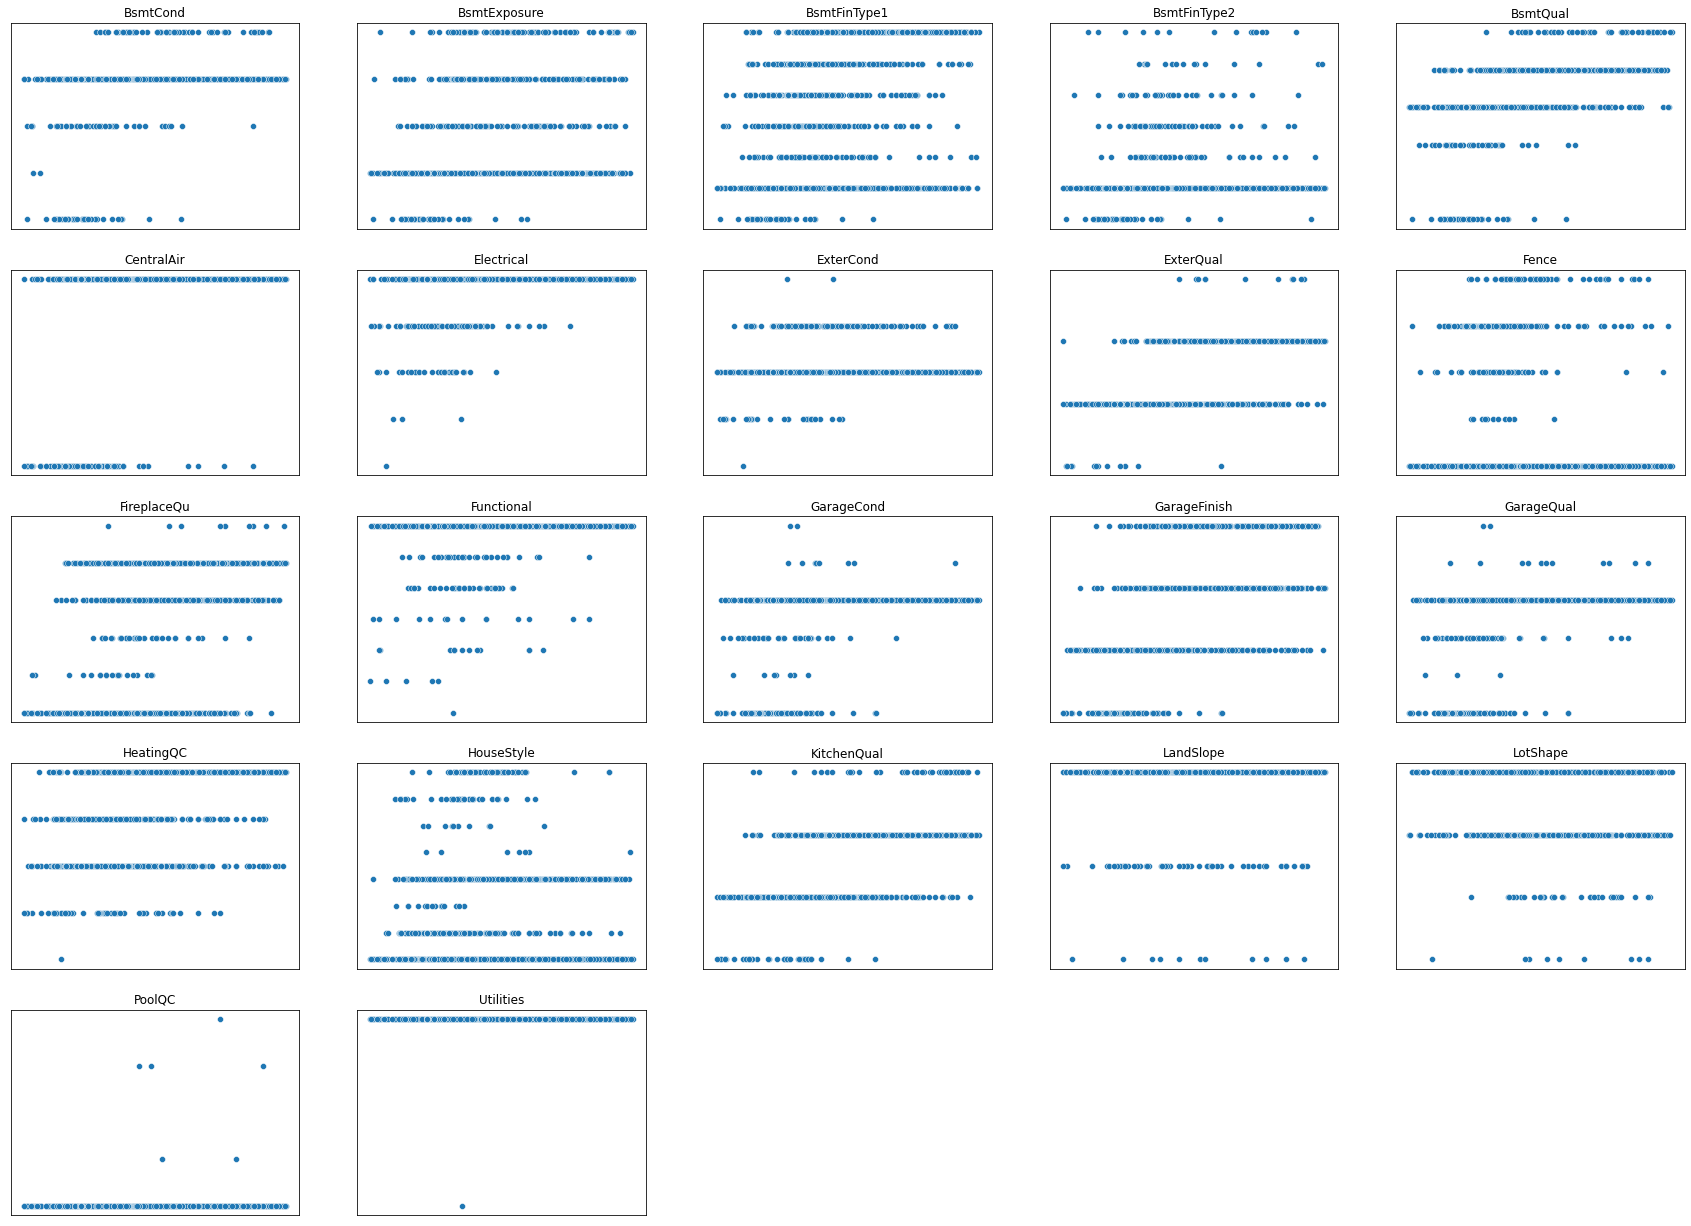

In [100]:
fig = plt.figure(figsize = (30,90)) #set up figure size
for i in range(len(ordinal_col)): # iterate through all the columns of rep16n df
    ax = fig.add_subplot (20,5,i+1) #iterate through subplot
    ax = sns.scatterplot(train['SalePrice'], train[ordinal_col[i]]) #scatter plot between `relative_votes` and other variables
    ax.axes.yaxis.set_visible(False) #remove the yaxis unit as we only care about the trend here
    ax.axes.xaxis.set_visible(False)
    plt.title(ordinal_col[i]) #change the title of each plot to respective columns

In [101]:
train_ord = train[ordinal_col]
train_ord['SalePrice'] = train['SalePrice']

In [102]:
train_ord_cor = train_ord.corr()[['SalePrice']]
train_ord_cor = train_ord_cor[train_ord_cor['SalePrice']>0.3]

In [103]:
train_ord_cor

,SalePrice
BsmtQual,0.537379
ExterQual,0.619285
FireplaceQu,0.486373
GarageCond,0.315298
GarageFinish,0.559474
GarageQual,0.319570
HeatingQC,0.429441
KitchenQual,0.602866
SalePrice,1.000000


In [104]:
y = train['SalePrice']
train = train.drop('SalePrice',axis = 1)

In [105]:
# Create the column transformer
col_trans = ColumnTransformer(col_transforms)

# Fit
col_trans = col_trans.fit(train)
#transform
col_trans_matrix = col_trans.transform(train)
#revert back to df 
df_oh_encoded = pd.DataFrame.sparse.from_spmatrix(col_trans_matrix, columns = col_trans.get_feature_names())

In [106]:
df_oh_encoded

,MSZoning__x0_C (all),MSZoning__x0_FV,MSZoning__x0_RH,MSZoning__x0_RL,MSZoning__x0_RM,Street__x0_Grvl,Street__x0_Pave,Alley__x0_Grvl,Alley__x0_NA,Alley__x0_Pave,LandContour__x0_Bnk,LandContour__x0_HLS,LandContour__x0_Low,LandContour__x0_Lvl,LotConfig__x0_Corner,LotConfig__x0_CulDSac,LotConfig__x0_FR2,LotConfig__x0_FR3,LotConfig__x0_Inside,Neighborhood__x0_Blmngtn,Neighborhood__x0_Blueste,Neighborhood__x0_BrDale,Neighborhood__x0_BrkSide,Neighborhood__x0_ClearCr,Neighborhood__x0_CollgCr,Neighborhood__x0_Crawfor,Neighborhood__x0_Edwards,Neighborhood__x0_Gilbert,Neighborhood__x0_IDOTRR,Neighborhood__x0_MeadowV,Neighborhood__x0_Mitchel,Neighborhood__x0_NAmes,Neighborhood__x0_NPkVill,Neighborhood__x0_NWAmes,Neighborhood__x0_NoRidge,Neighborhood__x0_NridgHt,Neighborhood__x0_OldTown,Neighborhood__x0_SWISU,Neighborhood__x0_Sawyer,Neighborhood__x0_SawyerW,Neighborhood__x0_Somerst,Neighborhood__x0_StoneBr,Neighborhood__x0_Timber,Neighborhood__x0_Veenker,Condition1__x0_Artery,Condition1__x0_Feedr,Condition1__x0_Norm,Condition1__x0_PosA,Condition1__x0_PosN,Condition1__x0_RRAe,Condition1__x0_RRAn,Condition1__x0_RRNe,Condition1__x0_RRNn,Condition2__x0_Artery,Condition2__x0_Feedr,Condition2__x0_Norm,Condition2__x0_PosN,Condition2__x0_RRAe,Condition2__x0_RRAn,Condition2__x0_RRNn,BldgType__x0_1Fam,BldgType__x0_2fmCon,BldgType__x0_Duplex,BldgType__x0_Twnhs,BldgType__x0_TwnhsE,RoofStyle__x0_Flat,RoofStyle__x0_Gable,RoofStyle__x0_Gambrel,RoofStyle__x0_Hip,RoofStyle__x0_Mansard,RoofStyle__x0_Shed,RoofMatl__x0_ClyTile,RoofMatl__x0_CompShg,RoofMatl__x0_Membran,RoofMatl__x0_Metal,RoofMatl__x0_Roll,RoofMatl__x0_Tar&Grv,RoofMatl__x0_WdShake,RoofMatl__x0_WdShngl,Exterior1st__x0_AsbShng,Exterior1st__x0_AsphShn,Exterior1st__x0_BrkComm,Exterior1st__x0_BrkFace,Exterior1st__x0_CBlock,Exterior1st__x0_CemntBd,Exterior1st__x0_HdBoard,Exterior1st__x0_ImStucc,Exterior1st__x0_MetalSd,Exterior1st__x0_Plywood,Exterior1st__x0_Stone,Exterior1st__x0_Stucco,Exterior1st__x0_VinylSd,Exterior1st__x0_Wd Sdng,Exterior1st__x0_WdShing,Exterior2nd__x0_AsbShng,Exterior2nd__x0_AsphShn,Exterior2nd__x0_Brk Cmn,Exterior2nd__x0_BrkFace,Exterior2nd__x0_CBlock,Exterior2nd__x0_CmentBd,Exterior2nd__x0_HdBoard,Exterior2nd__x0_ImStucc,Exterior2nd__x0_MetalSd,Exterior2nd__x0_Plywood,Exterior2nd__x0_Stone,Exterior2nd__x0_Stucco,Exterior2nd__x0_VinylSd,Exterior2nd__x0_Wd Sdng,Exterior2nd__x0_Wd Shng,MasVnrType__x0_BrkCmn,MasVnrType__x0_BrkFace,MasVnrType__x0_NA,MasVnrType__x0_None,MasVnrType__x0_Stone,Foundation__x0_BrkTil,Foundation__x0_CBlock,Foundation__x0_PConc,Foundation__x0_Slab,Foundation__x0_Stone,Foundation__x0_Wood,Heating__x0_Floor,Heating__x0_GasA,Heating__x0_GasW,Heating__x0_Grav,Heating__x0_OthW,Heating__x0_Wall,GarageType__x0_2Types,GarageType__x0_Attchd,GarageType__x0_Basment,GarageType__x0_BuiltIn,GarageType__x0_CarPort,GarageType__x0_Detchd,GarageType__x0_NA,PavedDrive__x0_N,PavedDrive__x0_P,PavedDrive__x0_Y,MiscFeature__x0_Gar2,MiscFeature__x0_NA,MiscFeature__x0_Othr,MiscFeature__x0_Shed,MiscFeature__x0_TenC,SaleType__x0_COD,SaleType__x0_CWD,SaleType__x0_Con,SaleType__x0_ConLD,SaleType__x0_ConLI,SaleType__x0_ConLw,SaleType__x0_New,SaleType__x0_Oth,SaleType__x0_WD,SaleCondition__x0_Abnorml,SaleCondition__x0_AdjLand,SaleCondition__x0_Alloca,SaleCondition__x0_Family,SaleCondition__x0_Normal,SaleCondition__x0_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.

In [107]:
df_oh_encoded.isnull().sum().sum()

0

In [108]:
a = set(train_ord_cor.index)
b = set(train_corr.index)

In [109]:
c= a.union(b)

In [110]:
c.remove('SalePrice')

In [111]:
X = train[c]


In [113]:
X


,MasVnrArea,YrSold,GrLivArea,3SsnPorch,LotFrontage,BedroomAbvGr,MoSold,Fireplaces,GarageArea,BsmtHalfBath,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2,MiscVal,GarageCond,LowQualFinSF,GarageCars,FireplaceQu,ExterQual,Id,PoolArea,HeatingQC,TotalBsmtSF,1stFlrSF,GarageYrBlt,OpenPorchSF,HalfBath,TotRmsAbvGrd,ScreenPorch,BsmtFullBath,2ndFlrSF,EnclosedPorch,OverallCond,GarageQual,GarageFinish,OverallQual,MSSubClass,YearRemodAdd,KitchenAbvGr,KitchenQual,LotArea,YearBuilt,WoodDeckSF,BsmtQual,FullBath
0,196.0,2008,1710,0,65.0,3,2,0,548,0,150,706,0,0,3.0,0,2,0.0,3.0,1,0,4.0,856,856,2003.0,61,1,8,0,1,854,0,5,3.0,2.0,7,60,2003,1,3.0,8450,2003,0,4.0,2
1,0.0,2007,1262,0,80.0,3,5,1,460,1,284,978,0,0,3.0,0,2,3.0,2.0,2,0,4.0,1262,1262,1976.0,0,0,6,0,0,0,0,8,3.0,2.0,6,20,1976,1,2.0,9600,1976,298,4.0,2
2,162.0,2008,1786,0,68.0,3,9,1,608,0,434,486,0,0,3.0,0,2,3.0,3.0,3,0,4.0,920,920,2001.0,42,1,6,0,1,866,0,5,3.0,2.0,7,60,2002,1,3.0,11250,2001,0,4.0,2
3,0.0,2006,1717,0,60.0,3,2,1,642,0,540,216,0,0,3.0,0,3,4.0,2.0,4,0,3.0,756,961,1998.0,35,0,7,0,1,756,272,5,3.0,1.0,7,70,1970,1,3.0,9550,1915,0,3.0,1
4,350.0,2008,2198,0,84.0,4,12,1,836,0,490,655,0,0,3.0,0,3,3.0,3.0,5,0,4.0,1145,1145,2000.0,84,1,9,0,1,1053,0,5,3.0,2.0,8,60,2000,1,3.0,14260,2000,192,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,2007,1647,0,62.0,3,8,1,460,0,953,0,0,0,3.0,0,2,3.0,2.0,1456,0,4.0,953,953,1999.0,40,1,7,0,0,694,0,5,3.0,2.0,6,60,2000,1,2.0,7917,1999,0,4.0,2
1456,119.0,2010,2073,0,85.0,3,2,2,500,0,589,790,163,0,3.0,0,2,3.0,2.0,1457,0,2.0,1542,2073,1978.0,0,0,7,0,1,0,0,6,3.0,1.0,6,20,1988,1,2.0,13175,1978,349,4.0,2
1457,0.0,2010,2340,0,66.0,4,5,2,252,0,877,275,0,2500,3.0,0,1,4.0,4.0,1458,0,4.0,1152,1188,1941.0,60,0,9,0,0,1152,0,9,3.0,2.0,7,70,2006,1,3.0,9042,1941,0,3.0,2
1458,0.0,2010,1078,0,68.0,2,4,0,240,0,0,49,1029,0,3.0,0,1,0.0,2.0,1459,0,3.0,1078,1078,1950.0,0,0,5,0,1,0,112,6,3.0,1.0,5,20,1996,1,3.0,9717,1950,366,3.0,1


In [114]:
X.isnull().sum().sum()

0

In [115]:
X2 = X.reset_index(drop = True)
X2

,MasVnrArea,YrSold,GrLivArea,3SsnPorch,LotFrontage,BedroomAbvGr,MoSold,Fireplaces,GarageArea,BsmtHalfBath,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2,MiscVal,GarageCond,LowQualFinSF,GarageCars,FireplaceQu,ExterQual,Id,PoolArea,HeatingQC,TotalBsmtSF,1stFlrSF,GarageYrBlt,OpenPorchSF,HalfBath,TotRmsAbvGrd,ScreenPorch,BsmtFullBath,2ndFlrSF,EnclosedPorch,OverallCond,GarageQual,GarageFinish,OverallQual,MSSubClass,YearRemodAdd,KitchenAbvGr,KitchenQual,LotArea,YearBuilt,WoodDeckSF,BsmtQual,FullBath
0,196.0,2008,1710,0,65.0,3,2,0,548,0,150,706,0,0,3.0,0,2,0.0,3.0,1,0,4.0,856,856,2003.0,61,1,8,0,1,854,0,5,3.0,2.0,7,60,2003,1,3.0,8450,2003,0,4.0,2
1,0.0,2007,1262,0,80.0,3,5,1,460,1,284,978,0,0,3.0,0,2,3.0,2.0,2,0,4.0,1262,1262,1976.0,0,0,6,0,0,0,0,8,3.0,2.0,6,20,1976,1,2.0,9600,1976,298,4.0,2
2,162.0,2008,1786,0,68.0,3,9,1,608,0,434,486,0,0,3.0,0,2,3.0,3.0,3,0,4.0,920,920,2001.0,42,1,6,0,1,866,0,5,3.0,2.0,7,60,2002,1,3.0,11250,2001,0,4.0,2
3,0.0,2006,1717,0,60.0,3,2,1,642,0,540,216,0,0,3.0,0,3,4.0,2.0,4,0,3.0,756,961,1998.0,35,0,7,0,1,756,272,5,3.0,1.0,7,70,1970,1,3.0,9550,1915,0,3.0,1
4,350.0,2008,2198,0,84.0,4,12,1,836,0,490,655,0,0,3.0,0,3,3.0,3.0,5,0,4.0,1145,1145,2000.0,84,1,9,0,1,1053,0,5,3.0,2.0,8,60,2000,1,3.0,14260,2000,192,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,2007,1647,0,62.0,3,8,1,460,0,953,0,0,0,3.0,0,2,3.0,2.0,1456,0,4.0,953,953,1999.0,40,1,7,0,0,694,0,5,3.0,2.0,6,60,2000,1,2.0,7917,1999,0,4.0,2
1334,119.0,2010,2073,0,85.0,3,2,2,500,0,589,790,163,0,3.0,0,2,3.0,2.0,1457,0,2.0,1542,2073,1978.0,0,0,7,0,1,0,0,6,3.0,1.0,6,20,1988,1,2.0,13175,1978,349,4.0,2
1335,0.0,2010,2340,0,66.0,4,5,2,252,0,877,275,0,2500,3.0,0,1,4.0,4.0,1458,0,4.0,1152,1188,1941.0,60,0,9,0,0,1152,0,9,3.0,2.0,7,70,2006,1,3.0,9042,1941,0,3.0,2
1336,0.0,2010,1078,0,68.0,2,4,0,240,0,0,49,1029,0,3.0,0,1,0.0,2.0,1459,0,3.0,1078,1078,1950.0,0,0,5,0,1,0,112,6,3.0,1.0,5,20,1996,1,3.0,9717,1950,366,3.0,1


In [116]:
X = pd.concat([X2,df_oh_encoded], axis = 1, )

In [117]:
X

,MasVnrArea,YrSold,GrLivArea,3SsnPorch,LotFrontage,BedroomAbvGr,MoSold,Fireplaces,GarageArea,BsmtHalfBath,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2,MiscVal,GarageCond,LowQualFinSF,GarageCars,FireplaceQu,ExterQual,Id,PoolArea,HeatingQC,TotalBsmtSF,1stFlrSF,GarageYrBlt,OpenPorchSF,HalfBath,TotRmsAbvGrd,ScreenPorch,BsmtFullBath,2ndFlrSF,EnclosedPorch,OverallCond,GarageQual,GarageFinish,OverallQual,MSSubClass,YearRemodAdd,KitchenAbvGr,KitchenQual,LotArea,YearBuilt,WoodDeckSF,BsmtQual,FullBath,MSZoning__x0_C (all),MSZoning__x0_FV,MSZoning__x0_RH,MSZoning__x0_RL,MSZoning__x0_RM,Street__x0_Grvl,Street__x0_Pave,Alley__x0_Grvl,Alley__x0_NA,Alley__x0_Pave,LandContour__x0_Bnk,LandContour__x0_HLS,LandContour__x0_Low,LandContour__x0_Lvl,LotConfig__x0_Corner,LotConfig__x0_CulDSac,LotConfig__x0_FR2,LotConfig__x0_FR3,LotConfig__x0_Inside,Neighborhood__x0_Blmngtn,Neighborhood__x0_Blueste,Neighborhood__x0_BrDale,Neighborhood__x0_BrkSide,Neighborhood__x0_ClearCr,Neighborhood__x0_CollgCr,Neighborhood__x0_Crawfor,Neighborhood__x0_Edwards,Neighborhood__x0_Gilbert,Neighborhood__x0_IDOTRR,Neighborhood__x0_MeadowV,Neighborhood__x0_Mitchel,Neighborhood__x0_NAmes,Neighborhood__x0_NPkVill,Neighborhood__x0_NWAmes,Neighborhood__x0_NoRidge,Neighborhood__x0_NridgHt,Neighborhood__x0_OldTown,Neighborhood__x0_SWISU,Neighborhood__x0_Sawyer,Neighborhood__x0_SawyerW,Neighborhood__x0_Somerst,Neighborhood__x0_StoneBr,Neighborhood__x0_Timber,Neighborhood__x0_Veenker,Condition1__x0_Artery,Condition1__x0_Feedr,Condition1__x0_Norm,Condition1__x0_PosA,Condition1__x0_PosN,Condition1__x0_RRAe,Condition1__x0_RRAn,Condition1__x0_RRNe,Condition1__x0_RRNn,Condition2__x0_Artery,Condition2__x0_Feedr,Condition2__x0_Norm,Condition2__x0_PosN,Condition2__x0_RRAe,Condition2__x0_RRAn,Condition2__x0_RRNn,BldgType__x0_1Fam,BldgType__x0_2fmCon,BldgType__x0_Duplex,BldgType__x0_Twnhs,BldgType__x0_TwnhsE,RoofStyle__x0_Flat,RoofStyle__x0_Gable,RoofStyle__x0_Gambrel,RoofStyle__x0_Hip,RoofStyle__x0_Mansard,RoofStyle__x0_Shed,RoofMatl__x0_ClyTile,RoofMatl__x0_CompShg,RoofMatl__x0_Membran,RoofMatl__x0_Metal,RoofMatl__x0_Roll,RoofMatl__x0_Tar&Grv,RoofMatl__x0_WdShake,RoofMatl__x0_WdShngl,Exterior1st__x0_AsbShng,Exterior1st__x0_AsphShn,Exterior1st__x0_BrkComm,Exterior1st__x0_BrkFace,Exterior1st__x0_CBlock,Exterior1st__x0_CemntBd,Exterior1st__x0_HdBoard,Exterior1st__x0_ImStucc,Exterior1st__x0_MetalSd,Exterior1st__x0_Plywood,Exterior1st__x0_Stone,Exterior1st__x0_Stucco,Exterior1st__x0_VinylSd,Exterior1st__x0_Wd Sdng,Exterior1st__x0_WdShing,Exterior2nd__x0_AsbShng,Exterior2nd__x0_AsphShn,Exterior2nd__x0_Brk Cmn,Exterior2nd__x0_BrkFace,Exterior2nd__x0_CBlock,Exterior2nd__x0_CmentBd,Exterior2nd__x0_HdBoard,Exterior2nd__x0_ImStucc,Exterior2nd__x0_MetalSd,Exterior2nd__x0_Plywood,Exterior2nd__x0_Stone,Exterior2nd__x0_Stucco,Exterior2nd__x0_VinylSd,Exterior2nd__x0_Wd Sdng,Exterior2nd__x0_Wd Shng,MasVnrType__x0_BrkCmn,MasVnrType__x0_BrkFace,MasVnrType__x0_NA,MasVnrType__x0_None,MasVnrType__x0_Stone,Foundation__x0_BrkTil,Foundation__x0_CBlock,Foundation__x0_PConc,Foundation__x0_Slab,Foundation__x0_Stone,Foundation__x0_Wood,Heating__x0_Floor,Heating__x0_GasA,Heating__x0_GasW,Heating__x0_Grav,Heating__x0_OthW,Heating__x0_Wall,GarageType__x0_2Types,GarageType__x0_Attchd,GarageType__x0_Basment,GarageType__x0_BuiltIn,GarageType__x0_CarPort,GarageType__x0_Detchd,GarageType__x0_NA,PavedDrive__x0_N,PavedDrive__x0_P,PavedDrive__x0_Y,MiscFeature__x0_Gar2,MiscFeature__x0_NA,MiscFeature__x0_Othr,MiscFeature__x0_Shed,MiscFeature__x0_TenC,SaleType__x0_COD,SaleType__x0_CWD,SaleType__x0_Con,SaleType__x0_ConLD,SaleType__x0_ConLI,SaleType__x0_ConLw,SaleType__x0_New,SaleType__x0_Oth,SaleType__x0_WD,SaleCondition__x0_Abnorml,SaleCondition__x0_AdjLand,SaleCondition__x0_Alloca,SaleCondition__x0_Family,SaleCondition__x0_Normal,SaleCondition__x0_Partial
0,196.0,2008,1710,0,65.0,3,2,0,548,0,150,706,0,0,3.0,0,2,0.0,3.0,1,0,4.0,856,856,2003.0,61,1,8,0,1,854,0,5,3.0,2.0,7,60,2003,1,3.0,8450,2003,0,4.0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.

In [118]:
scaler = MinMaxScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)

In [119]:
X_scaled

array([[0.1225    , 0.5       , 0.24442736, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.25      , 0.15833974, ..., 0.        , 1.        ,
        0.        ],
       [0.10125   , 0.5       , 0.25903151, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.36548809, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.12298232, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.5       , 0.15718678, ..., 0.        , 1.        ,
        0.        ]])

In [120]:
GBoost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [121]:
GBoost = GBoost.fit(X_scaled, y)

In [122]:
y_hat_GB = GBoost.predict(X_scaled)

In [123]:
mean_squared_log_error(y,y_hat_GB)

0.0010872366227703185

# Adding OHE columns

Check with test data

In [124]:
test = pd.read_csv('test.csv')

In [127]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [128]:
null_data2 = pd.DataFrame(data = test.isnull().sum(), columns = ['Num_empty'])
null_data2 = null_data2[null_data2['Num_empty'] >0]

In [129]:
#Columns to fill with most popular(mode):
mode_fill_col = ['MSZoning',  'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',  'BsmtFullBath',
                   'BsmtHalfBath', 'KitchenQual', 'Functional',   'GarageYrBlt',  'GarageCars', 'SaleType']
mode_fill_col.sort()
#columns to fill with 'NA'
NA_fill_col = ['Alley','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
NA_fill_col.sort()
#Columns to fill with mean
mean_fill_col = list(set(null_data2.index)-set(mode_fill_col)-set(NA_fill_col))
mean_fill_col.sort()

In [130]:
for i in mode_fill_col:
    test[i].fillna(test[i].mode()[0], inplace = True)
for i in NA_fill_col:
    test[i].fillna('NA', inplace = True)
for i in mean_fill_col:
    test[i].fillna(test[i].mean(), inplace = True)

In [131]:
for i in range(len(ordinal_col)):
    ordinal_tran(test,ordinal_list[i], ordinal_col[i])

In [132]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NA,3.0,Lvl,3.0,Inside,2.0,NAmes,Feedr,Norm,1Fam,0.0,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,2.0,CBlock,3.0,3.0,1.0,3.0,468.0,2.0,144.0,270.0,882.0,GasA,2.0,1.0,4.0,896,0,0,896,0.0,0.0,1,0,2,1,2.0,5,7.0,0,0.0,Attchd,1961.0,1.0,1.0,730.0,3.0,3.0,Y,140,0,0,0,120,0,0.0,3.0,NA,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NA,2.0,Lvl,3.0,Corner,2.0,NAmes,Norm,Norm,1Fam,0.0,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,2.0,2.0,CBlock,3.0,3.0,1.0,5.0,923.0,1.0,0.0,406.0,1329.0,GasA,2.0,1.0,4.0,1329,0,0,1329,0.0,0.0,1,1,3,1,3.0,6,7.0,0,0.0,Attchd,1958.0,1.0,1.0,312.0,3.0,3.0,Y,393,36,0,0,0,0,0.0,0.0,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NA,2.0,Lvl,3.0,Inside,2.0,Gilbert,Norm,Norm,1Fam,3.0,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,2.0,PConc,4.0,3.0,1.0,6.0,791.0,1.0,0.0,137.0,928.0,GasA,3.0,1.0,4.0,928,701,0,1629,0.0,0.0,2,1,3,1,2.0,6,7.0,1,3.0,Attchd,1997.0,3.0,2.0,482.0,3.0,3.0,Y,212,34,0,0,0,0,0.0,3.0,NA,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NA,2.0,Lvl,3.0,Inside,2.0,Gilbert,Norm,Norm,1Fam,3.0,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,2.0,2.0,PConc,3.0,3.0,1.0,6.0,602.0,1.0,0.0,324.0,926.0,GasA,4.0,1.0,4.0,926,678,0,1604,0.0,0.0,2,1,3,1,3.0,7,7.0,1,4.0,Attchd,1998.0,3.0,2.0,470.0,3.0,3.0,Y,360,36,0,0,0,0,0.0,0.0,NA,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NA,2.0,HLS,3.0,Inside,2.0,StoneBr,Norm,Norm,TwnhsE,0.0,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,3.0,2.0,PConc,4.0,3.0,1.0,5.0,263.0,1.0,0.0,1017.0,1280.0,GasA,4.0,1.0,4.0,1280,0,0,1280,0.0,0.0,2,0,2,1,3.0,5,7.0,0,0.0,Attchd,1992.0,2.0,2.0,506.0,3.0,3.0,Y,0,82,0,0,144,0,0.0,0.0,NA,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NA,3.0,Lvl,3.0,Inside,2.0,MeadowV,Norm,Norm,Twnhs,3.0,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,2.0,2.0,CBlock,3.0,3.0,1.0,1.0,0.0,1.0,0.0,546.0,546.0,GasA,3.0,1.0,4.0,546,546,0,1092,0.0,0.0,1,1,3,1,2.0,5,7.0,0,0.0,NA,2005.0,0.0,0.0,0.0,0.0,0.0,Y,0,0,0,0,0,0,0.0,0.0,NA,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NA,3.0,Lvl,3.0,Inside,2.0,MeadowV,Norm,Norm,TwnhsE,3.0,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,2.0,2.0,CBlock,3.0,3.0,1.0,3.0,252.0,1.0,0.0,294.0,546.0,GasA,2.0,1.0,4.0,546,546,0,1092,0.0,0.0,1,1,3,1,2.0,6,7.0,0,0.0,CarPort,1970.0,1.0,1.0,286.0,3.0,3.0,Y,0,24,0,0,0,0,0.0,0.0,NA,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NA,3.0,Lvl,3.0,Inside,2.0,Mitchel,Norm,Norm,1Fam,0.0,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,2.0,CBlock,3.0,3.0,1.0,5.0,1224.0,1.0,0.0,0.0,1224.0,GasA,4.0,1.0,4.0,1224,0,0,1224,1.0,0.0,1,0,4,1,2.0,7,7.0,1,3.0,Detchd,1960.0,1.0,2.0,576.0,3.0,3.0,Y,474,0,0,0,0,0,0.0,0.0,NA,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NA,3.0,Lvl,3.0,Inside,2.0,Mitchel,Norm,Norm,1Fam,6.0,5,5,1992,1992,Gable,Com

In [133]:

#transform
col_trans_matrix = col_trans.transform(test-)
#revert back to df 
df_oh_encoded = pd.DataFrame.sparse.from_spmatrix(col_trans_matrix, columns = col_trans.get_feature_names())

ValueError: Found unknown categories ['PosA'] in column 0 during transform

In [ ]:
test = test[c]

In [ ]:
test

In [ ]:
test = pd.concat([test,df_oh_encoded], axis = 1, )

In [ ]:
test

In [ ]:
scaler = MinMaxScaler()
scaler = scaler.fit(test)

In [ ]:
X_test_scaled = scaler.transform(test)

In [ ]:
y_hat_test_gb = GBoost.predict(X_test_scaled)

In [ ]:
y_hat_test_gb

In [ ]:
sample_submit = pd.read_csv('sample_submission.csv')
submit = sample_submit.drop('SalePrice', axis = 1)
submit['SalePrice'] = y_hat_test_gb
submit

In [ ]:
submit.to_csv('submit_futher_eng.csv', index = False)

In [ ]:
c

In [ ]:
len(c)